In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy


In [3]:
data=pd.read_csv("ToyotaCorolla.csv")

In [4]:
data.shape

(1436, 38)

In [5]:
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
data.drop(["Id","Model"],axis=1,inplace=True)#These two columns are useless for our analysis

In [8]:
data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,13500,23,10,2002,46986,Diesel,90,1,Blue,0,...,1,1,1,0,0,0,1,0,0,0
1,13750,23,10,2002,72937,Diesel,90,1,Silver,0,...,1,0,1,0,0,0,1,0,0,0
2,13950,24,9,2002,41711,Diesel,90,1,Blue,0,...,0,0,1,0,0,0,1,0,0,0
3,14950,26,7,2002,48000,Diesel,90,0,Black,0,...,0,0,1,0,0,0,1,0,0,0
4,13750,30,3,2002,38500,Diesel,90,0,Black,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,Petrol,86,1,Blue,0,...,1,1,1,0,1,1,1,0,0,0
1432,10845,72,9,1998,19000,Petrol,86,0,Grey,0,...,0,0,1,0,0,1,1,0,0,0
1433,8500,71,10,1998,17016,Petrol,86,0,Blue,0,...,0,0,1,0,0,0,1,0,0,0
1434,7250,70,11,1998,16916,Petrol,86,1,Grey,0,...,0,0,0,0,0,0,1,0,0,0


In [9]:
new_data=data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]

In [10]:
new_data.describe()

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
count,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000
mean,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961,10730.824513
std,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112,3626.964585
min,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000,4350.000000
25%,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000,8450.000000
50%,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000,9900.000000
75%,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000,11950.000000
max,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000,32500.000000


In [11]:
new_data.info()# No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Price          1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [12]:
new_data

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight,Price
0,23,46986,90,2000,3,5,210,1165,13500
1,23,72937,90,2000,3,5,210,1165,13750
2,24,41711,90,2000,3,5,210,1165,13950
3,26,48000,90,2000,3,5,210,1165,14950
4,30,38500,90,2000,3,5,210,1170,13750
...,...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025,7500
1432,72,19000,86,1300,3,5,69,1015,10845
1433,71,17016,86,1300,3,5,69,1015,8500
1434,70,16916,86,1300,3,5,69,1015,7250


<AxesSubplot:>

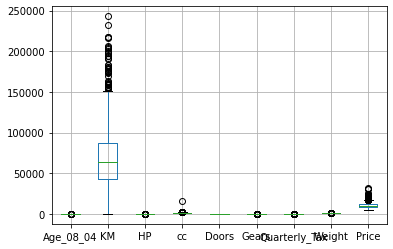

In [13]:
new_data.boxplot()

<AxesSubplot:>

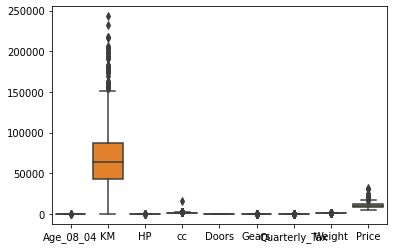

In [14]:
sns.boxplot(new_data)

{'whiskers': [<matplotlib.lines.Line2D at 0x15cf9547f10>,
 'caps': [<matplotlib.lines.Line2D at 0x15cf95584f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15cf9547d60>],
 'medians': [<matplotlib.lines.Line2D at 0x15cf9558a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x15cf9558d60>],
 'means': []}

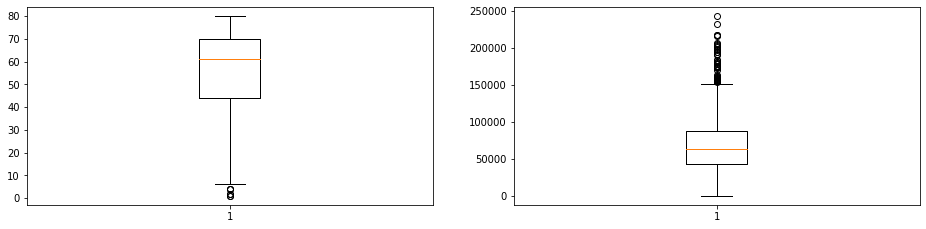

In [15]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
plt.boxplot(new_data['Age_08_04']);

plt.subplot(2,2,2)
plt.boxplot(new_data['KM'])

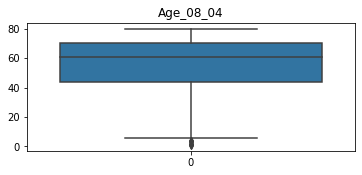

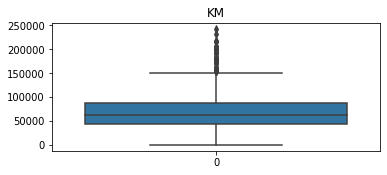

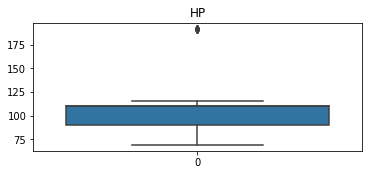

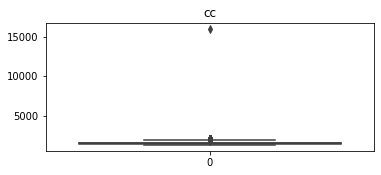

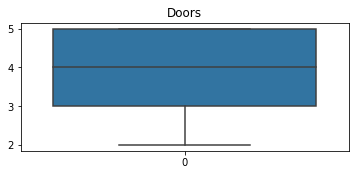

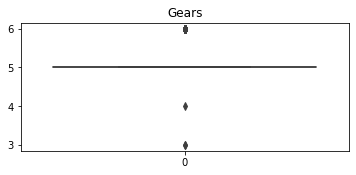

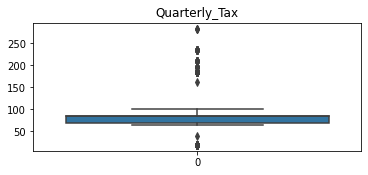

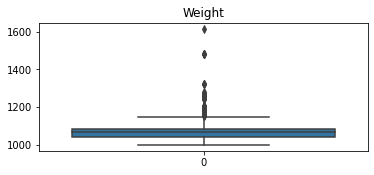

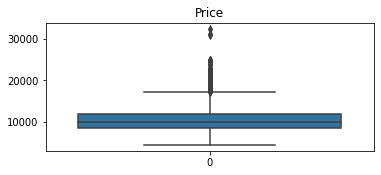

In [16]:
data=new_data

for i in range(len(data.columns)):
    plt.figure(figsize=(20,8))
    plt.subplot(3,3,i+1)
    sns.boxplot(data.iloc[:,i])
    plt.title(data.columns.values[i])
#all the boxplot to detect outliers

<AxesSubplot:>

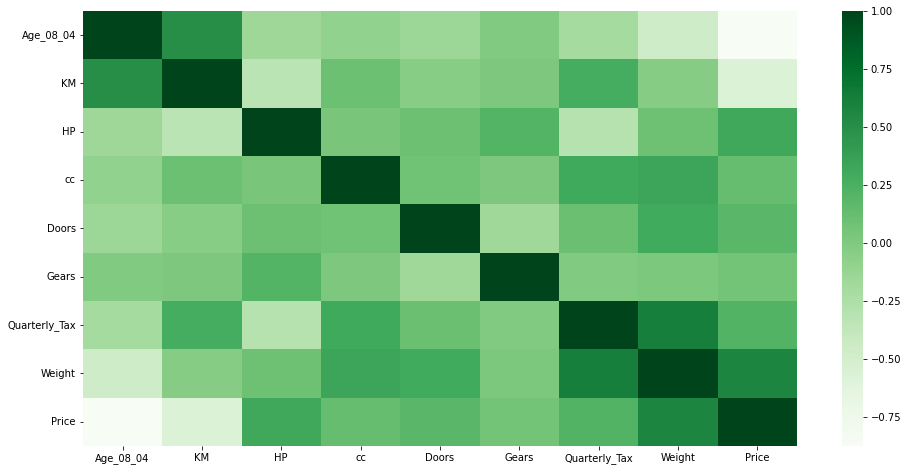

In [17]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(),cmap="Greens")
#We can observe that KM and Age has correlation which is a bad sign we need to dig more into it

In [18]:
data.corr()['Price'].sort_values(ascending=False)

Price            1.000000
Weight           0.581198
HP               0.314990
Quarterly_Tax    0.219197
Doors            0.185326
cc               0.126389
Gears            0.063104
KM              -0.569960
Age_08_04       -0.876590
Name: Price, dtype: float64

In [19]:
#Defining features and target
X=data.drop("Price",axis=1)
y=data["Price"]


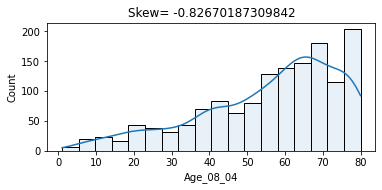

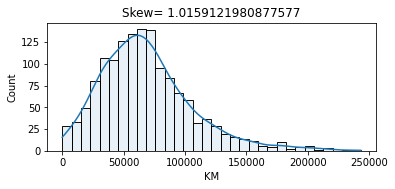

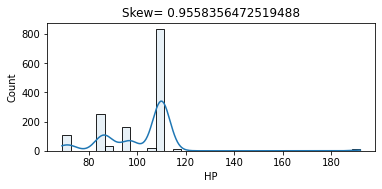

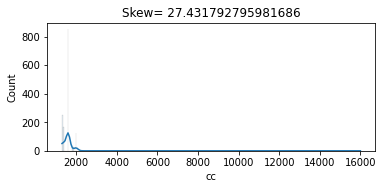

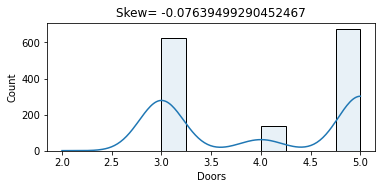

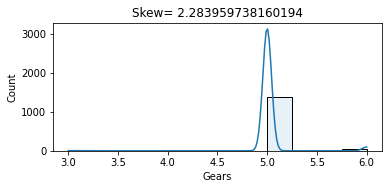

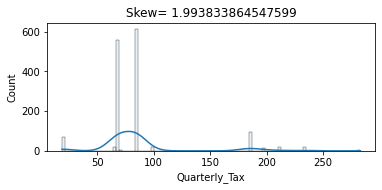

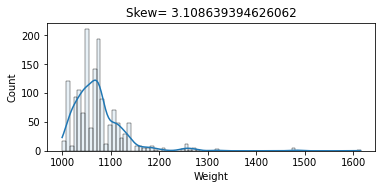

In [20]:
for i in range(len(X.columns)):
    plt.figure(figsize=(20,8))
    plt.subplot(3,3,i+1)
    sns.histplot(X.iloc[:,i],alpha=0.1,kde=True)
    plt.title(f"Skew= {X.iloc[:,i].skew()}")

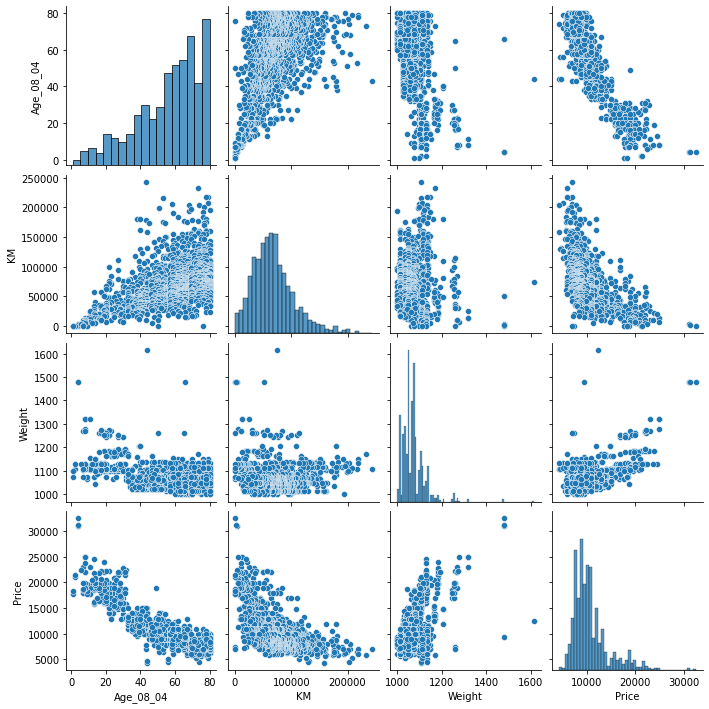

In [21]:
sns.pairplot(data.drop(["cc","HP","Doors","Gears","Quarterly_Tax"],axis=1))

In [22]:
for i in range(len(X.columns)):
    print(X.iloc[:,i].value_counts())

68    69
65    63
80    59
78    47
62    42
      ..
15     2
1      2
10     1
6      1
18     1
Name: Age_08_04, Length: 77, dtype: int64
36000     9
1         8
43000     7
59000     7
45000     6
         ..
45725     1
83405     1
17051     1
107859    1
77821     1
Name: KM, Length: 1263, dtype: int64
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: HP, dtype: int64
1600     845
1300     248
1400     164
2000     119
1900      30
1800      14
1587       4
1598       4
1332       2
1398       2
1995       2
16000      1
1975       1
Name: cc, dtype: int64
5    674
3    622
4    138
2      2
Name: Doors, dtype: int64
5    1390
6      43
3       2
4       1
Name: Gears, dtype: int64
85     613
69     559
185     96
19      72
100     19
234     19
64      18
210     18
197     14
72       3
283      3
40       1
163      1
Name: Quarterly_Tax, dtype: int64
1075    192
1050    168
1015    117
10

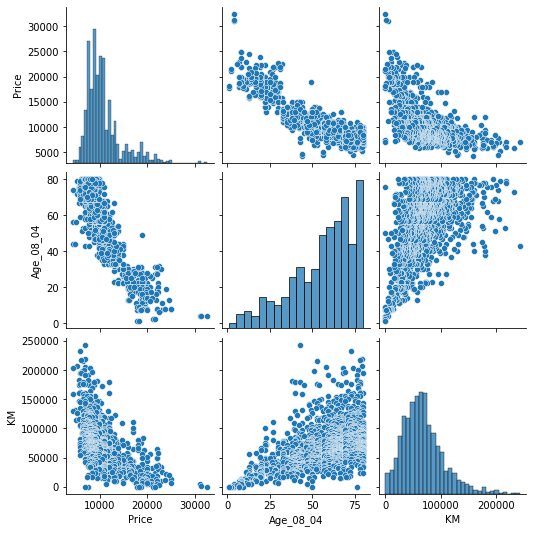

In [23]:
sns.pairplot(data[['Price',"Age_08_04","KM"]])
#There might be something we can work with by seeing this

In [24]:
correlation_matrix=data.corr()

In [25]:
correlation_matrix["Price"]["KM"]
#weak correlation but correlation nevertheless

-0.569960164533721

In [26]:
correlation_matrix["Price"]["Weight"]
#weak correlation but correlation nevertheless

0.5811975886422585

In [27]:
correlation_matrix["Price"]["Age_08_04"]
#strong correlation

-0.8765904971436398

## Now lets work on outliers

In [28]:
def iqr_outliers(x):
    '''
    This function returns all the outliers if you insert a pd.Series object into it.
    This used IQR(Inter-Quartile range) to finf out outliers above the upper and the lower bound.
    '''
    quant25=x.quantile(0.25)
    quant75=x.quantile(0.75)
    iqr=quant75-quant25
    lower=quant25-1.5*iqr
    upper=quant75+1.5*iqr
    outliers = [i for i in x if i < lower or i > upper]
    return np.ravel(sorted(outliers))


In [29]:
len(iqr_outliers(data.Price))

110

In [30]:
a=iqr_outliers(data.Price)

In [31]:
len(a)

110

In [32]:
class OutlierTreatment:
    '''Identify Outliers'''
    def __init__(self, y):
        ''' Class to identify and Treat outliers in data, need to pass pd.Series or basically 1D array into it '''
        self.x = copy.deepcopy(y)
        self.upper=None
        self.lower=None
        self.outliers=None
        

    def Detect_Outliers(self, lower_percentile=0.25, upper_percentile=0.75):
        ''' Represent percentile in the form of decimals, such as 50 percentile=0.5 etc.
            Default is 0.25 for lower and 0.75 for upper
        '''
        quantlower = self.x.quantile(lower_percentile)
        quantupper = self.x.quantile(upper_percentile)
        iqr = quantupper- quantlower
        self.lower = quantlower - 1.5 * iqr
        self.upper = quantupper + 1.5 * iqr
        self.outliers = [i for i in self.x if i < self.lower or i > self.upper]
        
        return np.ravel(sorted(self.outliers))
    
    def capping(self):
        '''Cap the outliers with upper and lower limits according to IQR'''
        capped_array = np.copy(self.x)  # Create a shallow copy of the original array
        for index, value in enumerate(capped_array):
            if value > self.upper:
                capped_array[index] = self.upper
            elif value < self.lower:
                capped_array[index] = self.lower
        return pd.Series(capped_array,index=self.x.index)
    
    def removing(self):
        '''Returns the number after removing the outliers'''
        filtered_values = [value for value in self.x if self.lower <= value <= self.upper]
        index=[index for index, value in self.x.items() if self.lower <= value <= self.upper]
        return pd.Series(filtered_values, index=index)
    
    


In [33]:
len(X.Age_08_04)

1436

In [34]:
test1=OutlierTreatment(X.Age_08_04)
test1.Detect_Outliers()
len(test1.removing())


1429

In [35]:
X.Age_08_04.sort_values(ascending=True)

185      1
184      1
183      2
182      2
110      4
        ..
1240    80
1341    80
1142    80
1077    80
1307    80
Name: Age_08_04, Length: 1436, dtype: int64

In [36]:
test1.removing().sort_values(ascending=True)

179      6
181      7
180      7
114      7
177      7
        ..
1353    80
1154    80
1162    80
1104    80
1341    80
Length: 1429, dtype: int64

In [37]:
test1.Detect_Outliers()

array([1, 1, 2, 2, 4, 4, 4])

In [38]:
len(X.Age_08_04)

1436

In [39]:
len(test1.removing())

1429

<AxesSubplot:>

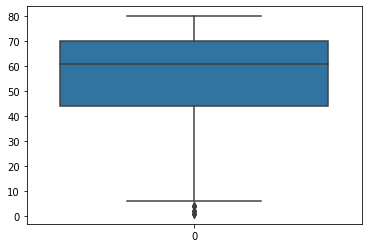

In [40]:
sns.boxplot(X.Age_08_04)

## Transformation

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

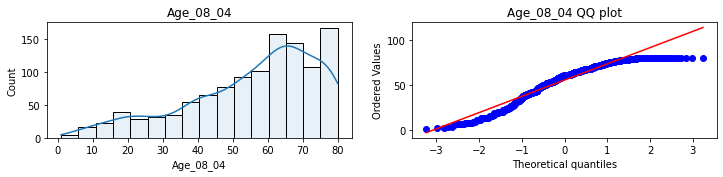

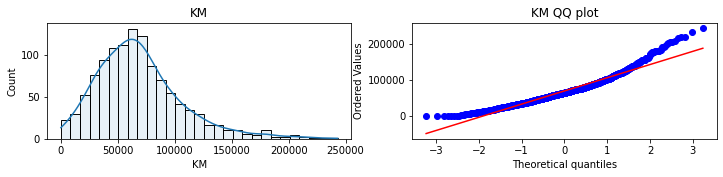

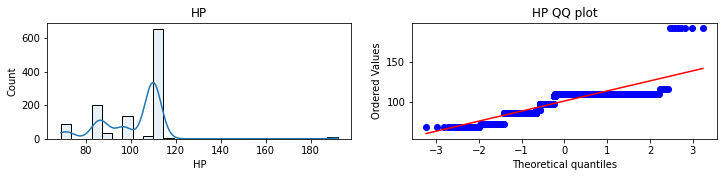

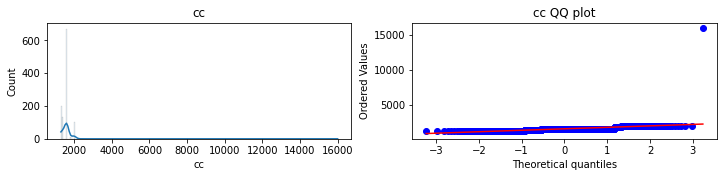

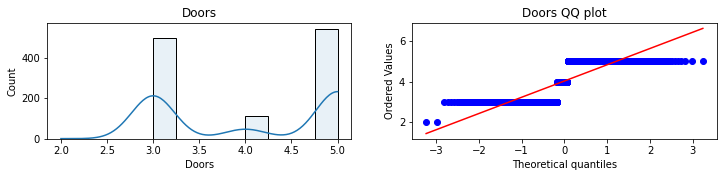

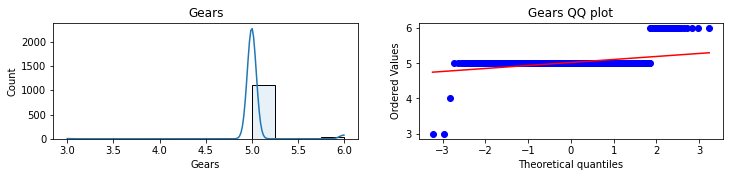

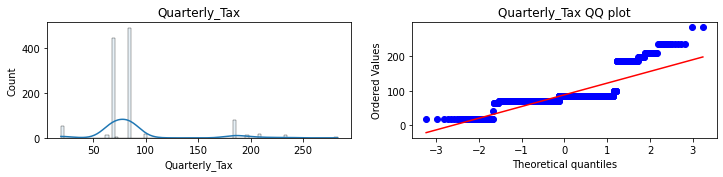

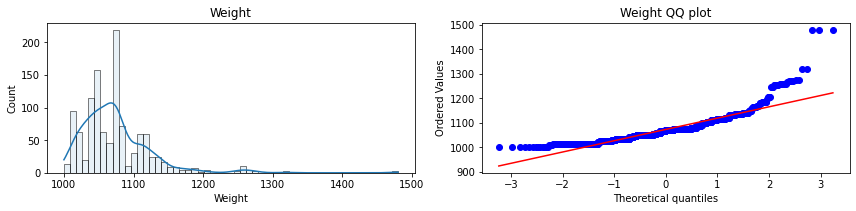

In [42]:
import scipy.stats as stats

# Determine the number of rows based on the number of columns in X_train
num_rows = len(X_train.columns)

# Loop through columns and create subplots
for i, v in enumerate(X_train.columns):
    plt.figure(figsize=(12, 20))
    
    # Create histogram subplot
    plt.subplot(num_rows, 2, 2* i + 1)
    sns.histplot(X_train[f'{v}'], kde=True, alpha=0.1)
    plt.title(f'{v}')

    # Create QQ plot subplot
    plt.subplot(num_rows, 2, 2* i + 2)
    stats.probplot(X_train[f'{v}'], dist='norm', plot=plt)
    plt.title(f'{v} QQ plot')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [43]:
from sklearn.preprocessing import FunctionTransformer
log_transform=FunctionTransformer(func=np.log1p)

In [44]:
X_train_transformed=log_transform.fit_transform(X_train)
X_test_transformed=log_transform.transform(X_test)

In [45]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
lr.score(X_test_transformed,y_test)

0.837503056459105

In [46]:
X_train_transformed

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
899,4.143135,10.990297,4.465908,7.170888,1.791759,1.791759,4.248495,6.943122
881,4.234107,11.027914,4.709530,7.378384,1.609438,1.791759,4.248495,6.943122
310,3.713572,10.562406,4.709530,7.378384,1.791759,1.791759,4.454347,6.985642
1145,4.330733,11.531315,4.709530,7.378384,1.791759,1.791759,4.454347,6.976348
31,3.135494,10.468801,4.584967,7.244942,1.386294,1.791759,4.454347,7.003974
...,...,...,...,...,...,...,...,...
1095,4.343805,11.742282,4.709530,7.378384,1.386294,1.791759,4.248495,6.957497
1130,4.304065,11.581602,4.709530,7.378384,1.386294,1.791759,4.248495,6.957497
1294,4.394449,11.180818,4.709530,7.378384,1.791759,1.791759,4.454347,6.976348
860,4.158883,11.077377,4.465908,7.170888,1.386294,1.791759,4.248495,6.928538


In [47]:
#Lets try to implement Ridge and Lasso Regularization even though its not overfitting

## We didnt scale the features earlier as Linear Regression uses OLS by default and doesnt use Iterative process. Here we need to scale for Ridge and Lasso as they iteratively try to reduce the values of our coefficients/weights close to 0 with different alphas

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_X_train=scaler.fit_transform(X_train_transformed)
scaled_X_test=scaler.transform(X_test_transformed)
scaled_y_train=scaler.fit_transform(y_train.values.reshape(-1,1))
scaled_y_test=scaler.transform(y_test.values.reshape(-1,1))


# Finding best hyper parameters(Hyperparameter Tuning)

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge


In [50]:
ridge=Ridge()

In [51]:
param_grid={'alpha':[0.5,1,2,5,10,20]}

In [53]:
search=GridSearchCV(estimator=ridge,param_grid=param_grid,cv=5)

In [92]:
search.fit(scaled_X_train,scaled_y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.5, 1, 2, 5, 10, 20]})

In [93]:
search.best_params_

{'alpha': 20}

In [94]:
search.best_score_

0.830157412275684

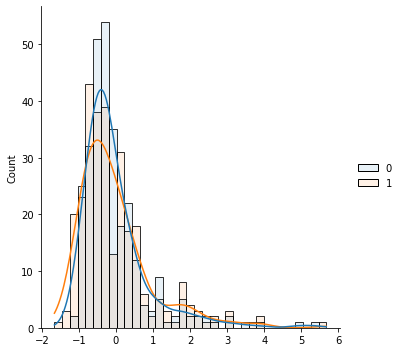

In [103]:
sns.displot((search.predict(scaled_X_test).flatten(),scaled_y_test.ravel()),kde=True,alpha=0.1)
# the graphs are almost the same for both test and train which means our model is doing good

In [ ]:
#our score without regularization was 83%

In [113]:
slope=search.best_estimator_.coef_.flatten()

In [114]:
features=X_train_transformed.columns

In [115]:
for m,feature in zip(slope,features):
    print(f'Feature {feature} has slope  {m}')

Feature Age_08_04 has slope  -0.7379120954630244
Feature KM has slope  0.004232916274110418
Feature HP has slope  0.1844731547545349
Feature cc has slope  -0.09984086095715465
Feature Doors has slope  -0.010707437782931315
Feature Gears has slope  0.03042400770130851
Feature Quarterly_Tax has slope  0.05184248551680364
Feature Weight has slope  0.23822496203817625


In [116]:
#Now lets do it with Ridgecv which automatically does best hyperparameter tuning 
from sklearn.linear_model import RidgeCV
alphas=[0.5,1,2,5,10,20]
ridge2=RidgeCV(alphas=alphas,store_cv_values=True)

In [120]:
ridge2.fit(scaled_X_train,scaled_y_train)

RidgeCV(alphas=[0.5, 1, 2, 5, 10, 20], store_cv_values=True)

In [127]:
ridge2.score(scaled_X_test,scaled_y_test)#sacme as doing grid search cv seperately

0.8358895896858056

In [130]:
ridge2.alpha_ #(Here it took alpha as 20 though)

20.0

In [ ]:
# Now lets do Lasso Regularization though it is used for feature selection as it brings the weights to almost 0 for insignificant features

In [131]:
from sklearn.linear_model import LassoCV

In [134]:
lasso=LassoCV(alphas=alphas)

In [136]:
lasso.fit(scaled_X_train,scaled_y_train.ravel())

LassoCV(alphas=[0.5, 1, 2, 5, 10, 20])

In [138]:
lasso.score(scaled_X_test,scaled_y_test)

0.5111070047067835

In [139]:
#Our score dropped alot because it brought the feature weights to 0 which were insignificant, lets see what it did

In [142]:
lasso.alpha_

0.5

## Feature Selection using Lasso

In [154]:
lasso.coef_ #Except for the first feature all the other feature weights are really close to 0 which was not in the case for ridge

array([-0.38803373, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [155]:
# whereas ridge was
ridge2.coef_

array([[-0.7379121 ,  0.00423292,  0.18447315, -0.09984086, -0.01070744,
         0.03042401,  0.05184249,  0.23822496]])

In [157]:
#Lets try to find important features in Lasso
for feature,weight in zip(features,lasso.coef_):
    if weight!=0:
        print(f'{feature} is impoortant with weight {weight} ')

Age_08_04 is impoortant with weight -0.38803373116239565 


In [162]:
dataframe_1feat=pd.DataFrame(scaled_X_train,columns=X_train_transformed.columns)#the first column has most importance it seems

In [176]:
feat1_test=pd.DataFrame(scaled_X_test,columns=X_train_transformed.columns)['Age_08_04'].values.reshape(-1,1)

In [165]:
dataframe_1feat.Age_08_04

0       0.391188
1       0.577293
2      -0.487589
3       0.774968
4      -1.670191
          ...   
1143    0.801710
1144    0.720411
1145    0.905314
1146    0.423405
1147    0.905314
Name: Age_08_04, Length: 1148, dtype: float64

In [167]:
#Lets try to make a prediction using this feature only
lr_1feat=LinearRegression()
lr_1feat.fit(dataframe_1feat.Age_08_04.values.reshape(-1,1),scaled_y_train)

LinearRegression()

In [178]:
feat1_y_pred=lr_1feat.predict(feat1_test)

## Lasso introduces Sparcity and is used for Dimension Reduction

In [179]:
from sklearn.metrics import r2_score

In [180]:
r2_score(scaled_y_test,feat1_y_pred) 

0.7654744026390023

In [ ]:
#though the score is not as good as with ridge and normal which was 83% each, we reduced the features i.e dimensions
#This is really good if we are working with High dimensional Data